# Explore experimental datasets of trajectories of cell shapes

In [1]:
import os

os.environ["GEOMSTATS_BACKEND"] = "pytorch"
import geomstats.backend as gs

INFO: Using pytorch backend


In [2]:
import matplotlib.pyplot as plt

# Import cell trajectories

In [3]:
import dyn.dyn.datasets.experimental as experimental

centers_traj, shapes_traj, imgs_traj, labels = experimental.load_trajectory_of_border_cells(
    n_sampling_points=50)

25 512 512

 Processing trajectory 1/16.
Converting 104438_MAX_9-10.tif into list of cell contours...

 Processing trajectory 2/16.
Converting 104438_MAX_9-11.tif into list of cell contours...

 Processing trajectory 3/16.
Converting 104438_MAX_9-7.tif into list of cell contours...

 Processing trajectory 4/16.
Converting 104438_MAX_9-8.tif into list of cell contours...

 Processing trajectory 5/16.
Converting 33623_MAX_9-1-28.tif into list of cell contours...

 Processing trajectory 6/16.
Converting 33623_MAX_9-1.tif into list of cell contours...

 Processing trajectory 7/16.
Converting 33623_MAX_9-2-1-28.tif into list of cell contours...
Found image of a different size: (190, 347) instead of (512, 512). Skipped image (not cell contours).
Found image of a different size: (190, 347) instead of (512, 512). Skipped image (not cell contours).
Found image of a different size: (190, 347) instead of (512, 512). Skipped image (not cell contours).
Found image of a different size: (190, 347) in

Found image of a different size: (287, 441) instead of (512, 512). Skipped image (not cell contours).
Found image of a different size: (287, 441) instead of (512, 512). Skipped image (not cell contours).
Found image of a different size: (287, 441) instead of (512, 512). Skipped image (not cell contours).
Found image of a different size: (287, 441) instead of (512, 512). Skipped image (not cell contours).
Found image of a different size: (287, 441) instead of (512, 512). Skipped image (not cell contours).
Found image of a different size: (287, 441) instead of (512, 512). Skipped image (not cell contours).
Found image of a different size: (287, 441) instead of (512, 512). Skipped image (not cell contours).
Found image of a different size: (287, 441) instead of (512, 512). Skipped image (not cell contours).
Found image of a different size: (287, 441) instead of (512, 512). Skipped image (not cell contours).
Found image of a different size: (287, 441) instead of (512, 512). Skipped image (

In [4]:
print(centers_traj.shape)
print(shapes_traj.shape)
print(labels)

torch.Size([16, 25, 2])
torch.Size([16, 25, 50, 2])
tensor([104438, 104438, 104438, 104438,  33623,  33623,  33623,  33623,  33623,
         33623,  59080,  59080,  59080,  59080,  59080,  59080])


In [5]:
n_traj, n_times, n_sampling_points, _ = shapes_traj.shape

# Inspect contouring

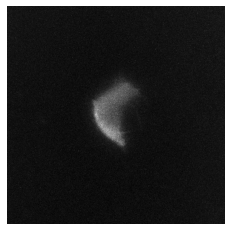

In [6]:
plt.imshow(imgs_traj[0][0], cmap="gray");
plt.axis("off");

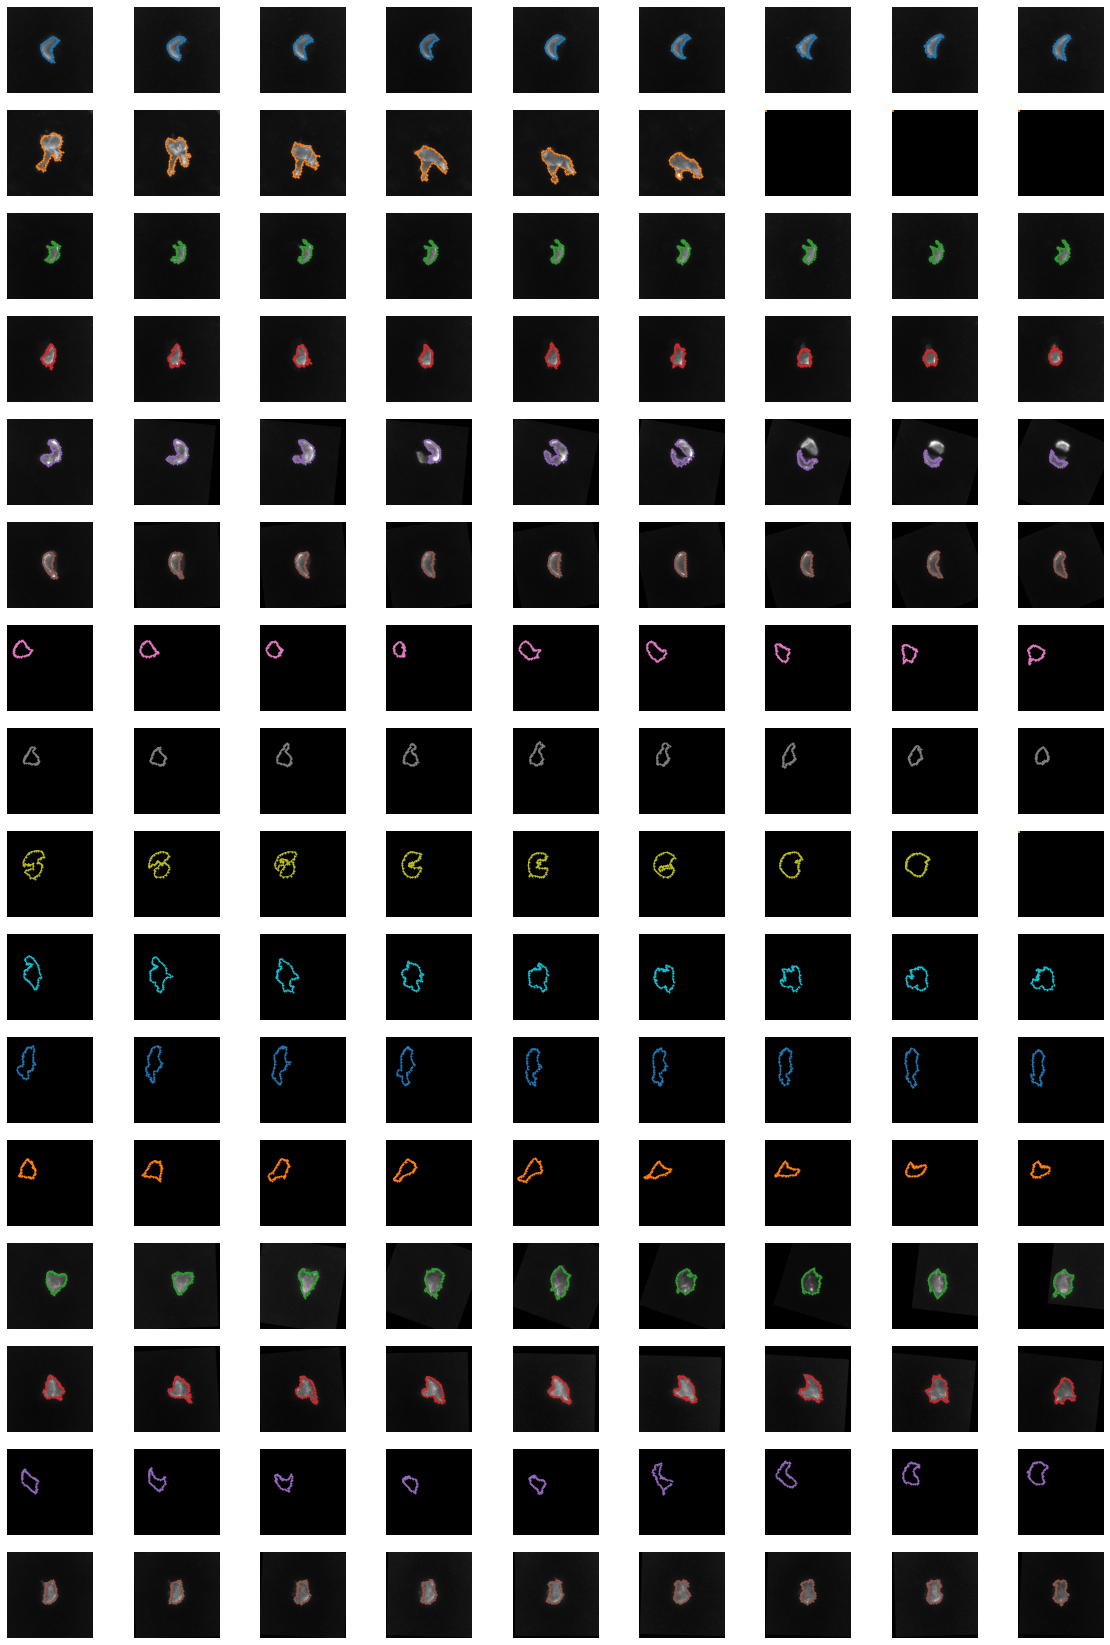

In [7]:
fig, axes = plt.subplots(
    n_traj, n_times // 3 + 1, figsize=(20, 30), sharex=True, sharey=True
)

for i_traj, (center, traj, img_traj) in enumerate(zip(centers_traj, shapes_traj, imgs_traj)):
    for i_time in range(n_times):
        if i_time % 3 != 0:  # only plot one image over 3
            continue
        contour = traj[i_time] + center[i_time]
        axes[i_traj, i_time // 3].imshow(img_traj[i_time], cmap='gray')
        axes[i_traj, i_time // 3].plot(
            contour[:, 0], contour[:, 1], 
            marker="o", markersize=1, c=f"C{i_traj}", linewidth=1
        )
        axes[i_traj, i_time // 3].axis('off')

We note that the contouring (code in experimental.py) worked. 
The black images indicate that the actual image was of another size (not 512, 512) and thus was skipped.

The contouring might not be precise enough to detect protusion: something to keep in mind.

# Plot trajectories

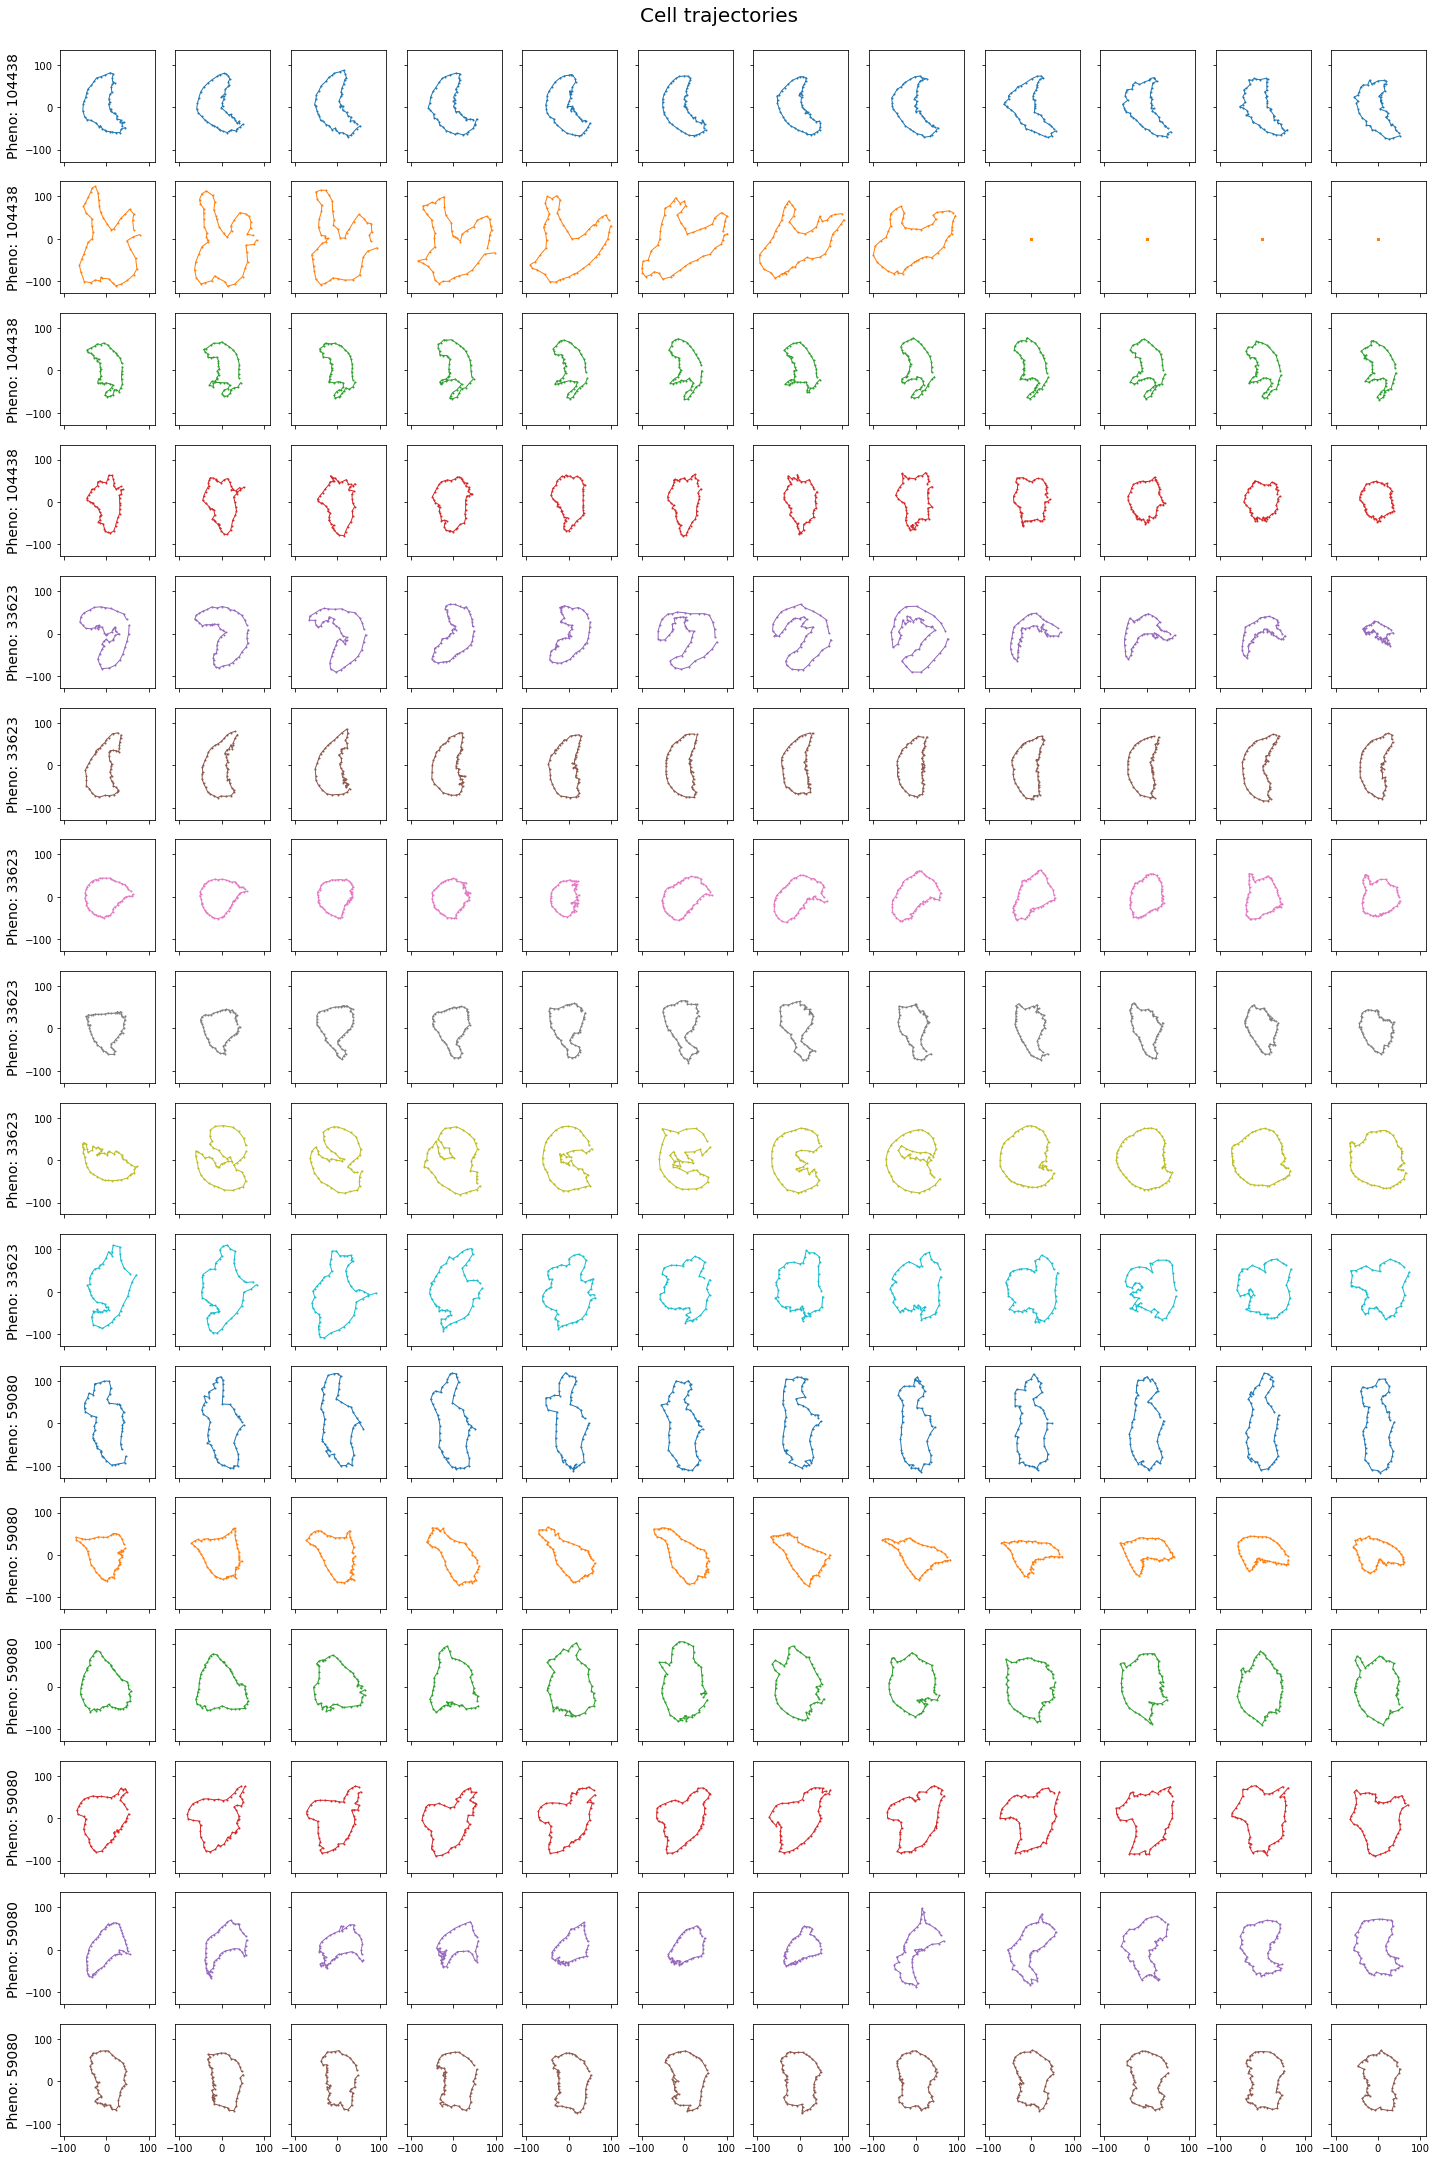

In [8]:
fig, axes = plt.subplots(
    n_traj, n_times // 2, figsize=(20, 30), sharex=True, sharey=True
)

for i_traj, (traj, label) in enumerate(zip(shapes_traj, labels)):
    axes[i_traj, 0].set_ylabel(f"Pheno: {label}", fontsize=14)
    for i_time in range(n_times):
        if i_time % 2 == 0:
            continue
        axes[i_traj, i_time // 2].plot(
            traj[i_time][:, 0], traj[i_time][:, 1], 
            marker="o", markersize=1, c=f"C{i_traj}", linewidth=1
        )
        axes[i_traj, i_time // 2].set_aspect("equal")

fig.suptitle("Cell trajectories", fontsize=20, y=1.0)
plt.tight_layout();